In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
import joblib

df= pd.read_csv('../dataset/road_accidents.csv')

bool_col = df.select_dtypes(include=['bool']).columns
df[bool_col] = df[bool_col].astype(int)

categorical_cols = ['lighting','weather','road_type','time_of_day']
numerical_cols = df.drop(columns=categorical_cols + ["accident_risk"]).columns.tolist()

preprocessor =ColumnTransformer(transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numerical_cols)])

pipeline= Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("knn", KNeighborsRegressor(n_neighbors=5))])

X = df.drop(columns=["accident_risk"])
y = df["accident_risk"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE",root_mean_squared_error(y_test,y_pred))

joblib.dump(pipeline, "accident_risk_model.joblib")
print(" Saved model as 'accident_risk_model.joblib'")

R2 Score: 0.8349013595439014
MSE: 0.0051929663999999995
MAE: 0.0570072
RMSE 0.07206223976535839
 Saved model as 'accident_risk_model.joblib'


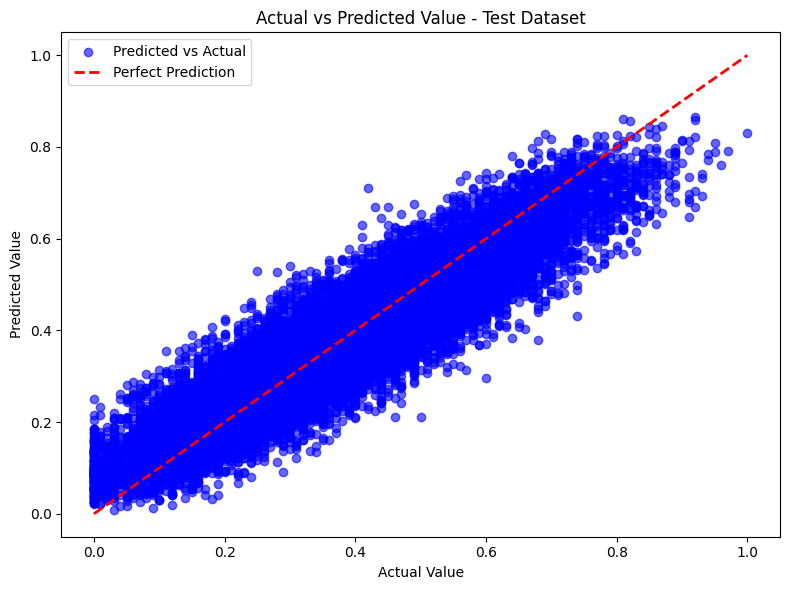

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test,y_pred,color='blue',alpha=0.6,label='Predicted vs Actual')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color='red',linestyle='--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs Predicted Value - Test Dataset')
plt.legend()
plt.tight_layout()
plt.show()